# Apple Stock Price Analysis

## Introduction

This dataset chronicles four decades of Apple Inc.'s stock price performance, spanning from December 1980, shortly after the company's initial public offering, through September 2020. The data captures one of the most remarkable corporate transformations in modern business history, documenting Apple's evolution from a fledgling personal computer manufacturer to one of the world's most valuable companies.

The dataset contains daily trading information including opening and closing prices, daily highs and lows, adjusted closing prices, and trading volumes. The adjusted close prices account for corporate actions such as stock splits and dividends, making them particularly valuable for analyzing long-term trends and returns. With over 10,000 trading days recorded, this comprehensive dataset provides a unique window into how Apple's market valuation has responded to product innovations, leadership changes, competitive pressures, and broader economic conditions.

During this 40-year period, Apple experienced dramatic fluctuations; from near-bankruptcy in the mid-1990s to becoming the first publicly traded U.S. company to reach a $2 trillion market capitalization. The data reflects pivotal moments including Steve Jobs' return to the company in 1997, the launch of transformative products like the iPod (2001), iPhone (2007), and iPad (2010), and the company's transition to a services-driven business model in the 2010s.

This historical stock price data offers opportunities to explore various analytical questions: How have Apple's returns compared to broader market indices? What patterns emerge around major product announcements? How has volatility changed across different eras of the company's history? Such analysis can yield insights not only into Apple's specific trajectory but also into broader themes of technology sector performance, innovation cycles, and investor behavior over time.

## Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = 'AppleStockPrices.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,1.001500e+04
mean,9.013322,9.107720,8.920993,9.018933,8.478195,3.413188e+08
std,16.842643,17.028099,16.677225,16.868353,16.466161,3.426534e+08
min,0.049665,0.049665,0.049107,0.049107,0.038743,1.388800e+06
25%,0.270089,0.275357,0.263951,0.270089,0.229988,1.315944e+08
50%,0.437500,0.446429,0.430357,0.437500,0.369111,2.285380e+08
75%,10.064286,10.185000,9.886071,10.102678,8.730120,4.250092e+08
max,132.759995,134.800003,130.529999,134.179993,134.179993,7.421641e+09


In [5]:
df.shape

(10016, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10016 entries, 0 to 10015
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10016 non-null  object 
 1   Open       10015 non-null  float64
 2   High       10015 non-null  float64
 3   Low        10015 non-null  float64
 4   Close      10015 non-null  float64
 5   Adj Close  10015 non-null  float64
 6   Volume     10015 non-null  float64
dtypes: float64(6), object(1)
memory usage: 547.9+ KB


The term High, Lows, Open and Close represent a crucial price points of a stock, over a specific trading period(like a day, a week, or an hour). 
1. Open price is the price at which the stock first trades when the market open for that particular trading period. This price is often influenced by overnight news or how sentiment has affected the stock;s value compared to the previous close.
2. High price is the highest price at which the stoack traded during the entire trading period. It reprents the maximum price buyers were willing to pay during that time.
3. Low price is the lowest price at which the stoack traded during the entire trading period. It represents the minimum price sellers were willing to accept during that time.
4. Close price is the price at which the staock last trades before the market officially closes for that particulat trading period. This is often considered the most important single-day price as it is used as the reference point for historical data and often for calculating price changes the next day. 

<Axes: >

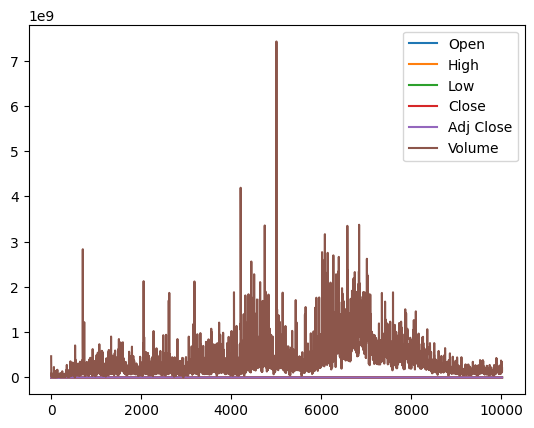

In [7]:
df.plot()

In [8]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [9]:
df['Date']

0        1980-12-12
1        1980-12-15
2        1980-12-16
3        1980-12-17
4        1980-12-18
            ...    
10011    2020-08-26
10012    2020-08-27
10013    2020-08-28
10014    2020-08-31
10015    2020-09-01
Name: Date, Length: 10016, dtype: object

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [11]:
df['Date']

0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10011   2020-08-26
10012   2020-08-27
10013   2020-08-28
10014   2020-08-31
10015   2020-09-01
Name: Date, Length: 10016, dtype: datetime64[ns]

In [12]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [13]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
10011,False,False,False,False,False,False,False
10012,False,False,False,False,False,False,False
10013,False,False,False,False,False,False,False
10014,False,False,False,False,False,False,False


In [14]:
df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
10011    False
10012    False
10013    False
10014    False
10015    False
Length: 10016, dtype: bool

In [15]:
df[df.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
165,1981-08-10,NaN,NaN,NaN,NaN,NaN,NaN


No reason on why the data is missing. 

In [16]:
df_cleaned = df.drop(index=165)
df_cleaned

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0
...,...,...,...,...,...,...,...
10011,2020-08-26,126.180000,126.992500,125.082497,126.522499,126.522499,163022400.0
10012,2020-08-27,127.142502,127.485001,123.832497,125.010002,125.010002,155552400.0
10013,2020-08-28,126.012497,126.442497,124.577499,124.807503,124.807503,187630000.0
10014,2020-08-31,127.580002,131.000000,126.000000,129.039993,129.039993,225702700.0


In [17]:
df_cleaned.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [18]:
df_cleaned['Year'] = df_cleaned['Date'].dt.year

In [19]:
df_cleaned['Close']-df_cleaned['Open']

0        0.000000
1       -0.000558
2       -0.000558
3        0.000000
4        0.000000
           ...   
10011    0.342499
10012   -2.132500
10013   -1.204994
10014    1.459991
10015    1.419998
Length: 10015, dtype: float64

In [20]:
(df_cleaned['Close']-df_cleaned['Open']).max()

np.float64(5.107506000000001)

In [21]:
(df_cleaned['Close']-df_cleaned['Open']).min()

np.float64(-4.484997)

In [22]:
df_cleaned.groupby('Year').mean()

,Date,Open,High,Low,Close,Adj Close,Volume
Year,,,,,,,
1980,1980-12-21 16:36:55.384615360,0.136075,0.136461,0.135903,0.135903,0.107222,1.034501e+08
1981,1981-07-02 10:05:42.857142848,0.108868,0.109251,0.108531,0.108531,0.085626,3.252756e+07
1982,1982-07-03 00:00:00.000000000,0.085446,0.086665,0.084630,0.085459,0.067423,8.444667e+07
1983,1983-07-01 23:42:55.494071168,0.167274,0.171085,0.163449,0.167274,0.131972,1.759408e+08
1984,1984-07-01 07:58:06.166007936,0.119956,0.122294,0.117642,0.119651,0.094400,1.659250e+08
1985,1985-07-01 10:40:00.000000000,0.091057,0.092023,0.089937,0.090233,0.071190,1.805249e+08
1986,1986-07-02 05:58:34.624505920,0.144586,0.147048,0.142207,0.144913,0.114330,2.107637e+08
1987,1987-07-02 13:45:17.786561280,0.347817,0.355806,0.339820,0.347751,0.274894,2.362502e+08
1988,1988-07-02 00:22:46.007905152,0.371034,0.376663,0.365092,0.370884,0.295239,1.632134e+08


### Data Overview

Analysis of the last 5 years

In [23]:
df_15 = df_cleaned[df_cleaned['Year']==2015]

In [24]:
df_15

,Date,Open,High,Low,Close,Adj Close,Volume,Year
8589,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.941502,212818400.0,2015
8590,2015-01-05,27.072500,27.162500,26.352501,26.562500,24.238857,257142000.0,2015
8591,2015-01-06,26.635000,26.857500,26.157499,26.565001,24.241146,263188400.0,2015
8592,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.581060,160423600.0,2015
8593,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.525522,237458000.0,2015
...,...,...,...,...,...,...,...,...
8836,2015-12-24,27.250000,27.250000,26.987499,27.007500,25.064844,54281600.0,2015
8837,2015-12-28,26.897499,26.922501,26.545000,26.705000,24.784105,106816800.0,2015
8838,2015-12-29,26.740000,27.357500,26.715000,27.184999,25.229576,123724800.0,2015
8839,2015-12-30,27.145000,27.174999,26.795000,26.830000,24.900110,100855200.0,2015


In [25]:
df_15.loc[df_15.index[-1], 'Close']-df_15.loc[df_15.index[0], 'Close']

np.float64(-1.0174990000000008)

In [26]:
((df_15.loc[df_15.index[-1], 'Volume']-df_15.loc[df_15.index[0], 'Volume'])/df_15.loc[df_15.index[0], 'Volume'])*100

np.float64(-23.10382936813734)

In [27]:
df_15['Volume'].sum()

np.float64(52264199600.0)

In [28]:
df_15[((df_15['Close']- df_15['Open'])/df_15['Open'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
8750,2015-08-24,23.717501,27.200001,23.0,25.780001,23.823662,648825200.0,2015


In [29]:
df_15[((df_15['High']- df_15['Low'])/df_15['Low'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
8742,2015-08-12,28.132500,28.855000,27.407499,28.809999,26.623724,404870000.0,2015
8749,2015-08-21,27.607500,27.975000,26.412500,26.440001,24.433575,513102000.0,2015
8750,2015-08-24,23.717501,27.200001,23.000000,25.780001,23.823662,648825200.0,2015
8751,2015-08-25,27.777500,27.777500,25.875000,25.934999,23.966902,414406400.0,2015
8775,2015-09-29,28.207500,28.377501,26.965000,27.264999,25.195972,293461600.0,2015


There is a 5% percent change in the High and Lows, which suggests that the stock were highly volatile and unstability during the month of August. Further research revealed that in August 2015, Apple faced investor concerns over a market downturn and announced a repair program for some iPhone 6 Plus models with faulty cameras. 

In [30]:
df_16 = df_cleaned[df_cleaned['Year']==2016]

In [31]:
df_16

,Date,Open,High,Low,Close,Adj Close,Volume,Year
8841,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.443037,270597600.0,2016
8842,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.830513,223164000.0,2016
8843,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.364161,273829600.0,2016
8844,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.378082,324377600.0,2016
8845,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.496408,283192000.0,2016
...,...,...,...,...,...,...,...,...
9088,2016-12-23,28.897499,29.129999,28.897499,29.129999,27.636169,56998000.0,2016
9089,2016-12-27,29.129999,29.450001,29.122499,29.315001,27.811686,73187600.0,2016
9090,2016-12-28,29.379999,29.504999,29.049999,29.190001,27.693100,83623600.0,2016
9091,2016-12-29,29.112499,29.277500,29.100000,29.182501,27.685980,60158000.0,2016


In [32]:
df_16.loc[df_16.index[-1], 'Close']-df_16.loc[df_16.index[0], 'Close']

np.float64(2.6174999999999997)

In [33]:
((df_16.loc[df_16.index[-1], 'Volume']-df_16.loc[df_16.index[0], 'Volume'])/df_16.loc[df_16.index[0], 'Volume'])*100

np.float64(-54.7870343269859)

In [34]:
df_16['Volume'].sum()

np.float64(38729911200.0)

In [35]:
df_16[((df_16['Close']- df_16['Open'])/df_16['Open'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year


In [36]:
df_16[((df_16['High']- df_16['Low'])/df_16['Low'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
8852,2016-01-20,23.775,24.547501,23.355,24.1975,22.45697,289337600.0,2016


In [37]:
df_17 = df_cleaned[df_cleaned['Year']==2017]

In [38]:
df_17

,Date,Open,High,Low,Close,Adj Close,Volume,Year
9093,2017-01-03,28.950001,29.082500,28.690001,29.037500,27.548414,115127600.0,2017
9094,2017-01-04,28.962500,29.127501,28.937500,29.004999,27.517582,84472400.0,2017
9095,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.657520,88774400.0,2017
9096,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.965857,127007600.0,2017
9097,2017-01-09,29.487499,29.857500,29.485001,29.747499,28.222006,134247600.0,2017
...,...,...,...,...,...,...,...,...
9339,2017-12-22,43.669998,43.855000,43.625000,43.752499,42.176311,65397600.0,2017
9340,2017-12-26,42.700001,42.867500,42.419998,42.642502,41.106304,132742000.0,2017
9341,2017-12-27,42.525002,42.695000,42.427502,42.650002,41.113533,85992800.0,2017
9342,2017-12-28,42.750000,42.962502,42.619999,42.770000,41.229214,65920800.0,2017


In [39]:
df_17.loc[df_17.index[-1], 'Close']-df_17.loc[df_17.index[0], 'Close']

np.float64(13.269998999999999)

In [40]:
((df_17.loc[df_17.index[-1], 'Volume']-df_17.loc[df_17.index[0], 'Volume'])/df_17.loc[df_17.index[0], 'Volume'])*100

np.float64(-9.665796907083966)

In [41]:
df_17['Volume'].sum()

np.float64(27243106000.0)

In [42]:
df_17[((df_17['Close']- df_17['Open'])/df_17['Open'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year


In [43]:
df_17[((df_17['High']- df_17['Low'])/df_17['Low'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
9202,2017-06-09,38.797501,38.797501,36.505001,37.244999,35.634693,259530800.0,2017


In [44]:
df_18 = df_cleaned[df_cleaned['Year']==2018]

In [45]:
df_18

,Date,Open,High,Low,Close,Adj Close,Volume,Year
9344,2018-01-02,42.540001,43.075001,42.314999,43.064999,41.513580,102223600.0,2018
9345,2018-01-03,43.132500,43.637501,42.990002,43.057499,41.506344,118071600.0,2018
9346,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.699139,89738400.0,2018
9347,2018-01-05,43.360001,43.842499,43.262501,43.750000,42.173893,94640000.0,2018
9348,2018-01-08,43.587502,43.902500,43.482498,43.587502,42.017254,82271200.0,2018
...,...,...,...,...,...,...,...,...
9590,2018-12-24,37.037498,37.887501,36.647499,36.707500,35.916355,148676800.0,2018
9591,2018-12-26,37.075001,39.307499,36.680000,39.292500,38.445637,234330000.0,2018
9592,2018-12-27,38.959999,39.192501,37.517502,39.037498,38.196133,212468400.0,2018
9593,2018-12-28,39.375000,39.630001,38.637501,39.057499,38.215702,169165600.0,2018


In [46]:
df_18.loc[df_18.index[-1], 'Close']-df_18.loc[df_18.index[0], 'Close']

np.float64(-3.6299980000000005)

In [47]:
((df_18.loc[df_18.index[-1], 'Volume']-df_18.loc[df_18.index[0], 'Volume'])/df_18.loc[df_18.index[0], 'Volume'])*100

np.float64(36.96837129586514)

In [48]:
df_18['Volume'].sum()

np.float64(34156144800.0)

In [49]:
df_18[((df_18['Close']- df_18['Open'])/df_18['Open'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
9368,2018-02-06,38.707500,40.930000,38.50,40.7575,39.289200,272975200.0,2018
9591,2018-12-26,37.075001,39.307499,36.68,39.2925,38.445637,234330000.0,2018


In [50]:
df_18[((df_18['High']- df_18['Low'])/df_18['Low'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
9367,2018-02-05,39.775002,40.970001,39.000000,39.122501,37.713100,290954000.0,2018
9368,2018-02-06,38.707500,40.930000,38.500000,40.757500,39.289200,272975200.0,2018
9371,2018-02-09,39.267502,39.472500,37.560001,39.102501,37.847511,282690400.0,2018
9552,2018-10-29,54.797501,54.922501,51.522499,53.060001,51.735893,183742000.0,2018
9587,2018-12-19,41.500000,41.862499,39.772499,40.222500,39.355591,196189200.0,2018
9589,2018-12-21,39.215000,39.540001,37.407501,37.682499,36.870335,382978400.0,2018
9591,2018-12-26,37.075001,39.307499,36.680000,39.292500,38.445637,234330000.0,2018


In [51]:
df_19 = df_cleaned[df_cleaned['Year']==2019]

In [52]:
df_19

,Date,Open,High,Low,Close,Adj Close,Volume,Year
9595,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.629097,148158800.0,2019
9596,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.781353,365248800.0,2019
9597,2019-01-04,36.132500,37.137501,35.950001,37.064999,36.266144,234428400.0,2019
9598,2019-01-07,37.174999,37.207500,36.474998,36.982498,36.185429,219111200.0,2019
9599,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.875229,164101200.0,2019
...,...,...,...,...,...,...,...,...
9842,2019-12-24,71.172501,71.222504,70.730003,71.067497,70.580566,48478800.0,2019
9843,2019-12-26,71.205002,72.495003,71.175003,72.477501,71.980911,93121200.0,2019
9844,2019-12-27,72.779999,73.492500,72.029999,72.449997,71.953598,146266000.0,2019
9845,2019-12-30,72.364998,73.172501,71.305000,72.879997,72.380653,144114400.0,2019


In [53]:
df_19.loc[df_19.index[-1], 'Close']-df_19.loc[df_19.index[0], 'Close']

np.float64(33.932498)

In [54]:
((df_19.loc[df_19.index[-1], 'Volume']-df_19.loc[df_19.index[0], 'Volume'])/df_19.loc[df_19.index[0], 'Volume'])*100

np.float64(-31.961111996047485)

In [55]:
df_19['Volume'].sum()

np.float64(28254942800.0)

In [56]:
df_19[((df_19['Close']- df_19['Open'])/df_19['Open'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year


In [57]:
df_19[((df_19['High']- df_19['Low'])/df_19['Low'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
9741,2019-08-01,53.474998,54.507500,51.685001,52.107498,51.400280,216071600.0,2019
9749,2019-08-13,50.255001,53.035000,50.119999,52.242500,51.729252,188874000.0,2019
9757,2019-08-23,52.357498,53.012501,50.250000,50.660000,50.162300,187272000.0,2019
9805,2019-10-31,61.810001,62.292500,59.314999,62.189999,61.579021,139162000.0,2019


In [58]:
df_20 = df_cleaned[df_cleaned['Year']==2020]

In [59]:
df_20

,Date,Open,High,Low,Close,Adj Close,Volume,Year
9847,2020-01-02,74.059998,75.150002,73.797501,75.087502,74.573036,135480400.0,2020
9848,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.848030,146322800.0,2020
9849,2020-01-06,73.447502,74.989998,73.187500,74.949997,74.436470,118387200.0,2020
9850,2020-01-07,74.959999,75.224998,74.370003,74.597504,74.086395,108872000.0,2020
9851,2020-01-08,74.290001,76.110001,74.290001,75.797501,75.278160,132079200.0,2020
...,...,...,...,...,...,...,...,...
10011,2020-08-26,126.180000,126.992500,125.082497,126.522499,126.522499,163022400.0,2020
10012,2020-08-27,127.142502,127.485001,123.832497,125.010002,125.010002,155552400.0,2020
10013,2020-08-28,126.012497,126.442497,124.577499,124.807503,124.807503,187630000.0,2020
10014,2020-08-31,127.580002,131.000000,126.000000,129.039993,129.039993,225702700.0,2020


In [60]:
df_20.loc[df_20.index[-1], 'Close']-df_20.loc[df_20.index[0], 'Close']

np.float64(59.092490999999995)

In [61]:
((df_20.loc[df_20.index[-1], 'Volume']-df_20.loc[df_20.index[0], 'Volume'])/df_20.loc[df_20.index[0], 'Volume'])*100

np.float64(12.155042352989804)

In [62]:
df_20['Volume'].sum()

np.float64(28793265200.0)

In [63]:
df_20[((df_20['Close']- df_20['Open'])/df_20['Open'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
9886,2020-02-28,64.315002,69.602501,64.092499,68.339996,68.032837,426884800.0,2020
9887,2020-03-02,70.570000,75.360001,69.430000,74.702499,74.366737,341397200.0,2020


In [64]:
df_20[((df_20['High']- df_20['Low'])/df_20['Low'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
9882,2020-02-24,74.315002,76.044998,72.307503,74.544998,74.209946,222195200.0,2020
9883,2020-02-25,75.237503,75.632500,71.532501,72.019997,71.696297,230673600.0,2020
9886,2020-02-28,64.315002,69.602501,64.092499,68.339996,68.032837,426884800.0,2020
9887,2020-03-02,70.570000,75.360001,69.430000,74.702499,74.366737,341397200.0,2020
9888,2020-03-03,75.917503,76.000000,71.449997,72.330002,72.004913,319475600.0,2020
9892,2020-03-09,65.937500,69.522499,65.750000,66.542503,66.243423,286744800.0,2020
9893,2020-03-10,69.285004,71.610001,67.342499,71.334999,71.014381,285290000.0,2020
9895,2020-03-12,63.985001,67.500000,62.000000,62.057499,61.778580,418474000.0,2020
9896,2020-03-13,66.222504,69.980003,63.237499,69.492500,69.180161,370732000.0,2020
9897,2020-03-16,60.487499,64.769997,60.000000,60.552502,60.280346,322423600.0,2020


In [67]:
df_20_month = df_20.tail(30) 

In [69]:
df_20_month.loc[df_20_month.index[-1], 'Close']-df_20_month.loc[df_20_month.index[0], 'Close']

np.float64(36.907494)

In [70]:
((df_20_month.loc[df_20_month.index[-1], 'Volume']-df_20_month.loc[df_20_month.index[0], 'Volume'])/df_20_month.loc[df_20_month.index[0], 'Volume'])*100

np.float64(70.72513303131629)

In [71]:
df_20_month['Volume'].sum()

np.float64(5541651600.0)

In [72]:
df_20_month[((df_20_month['Close']- df_20_month['Open'])/df_20_month['Open'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year


In [73]:
df_20_month[((df_20_month['High']- df_20_month['Low'])/df_20_month['Low'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
9987,2020-07-23,96.997498,97.077499,92.010002,92.845001,92.677902,197004400.0,2020
9993,2020-07-31,102.885002,106.415001,100.824997,106.260002,106.068756,374336800.0,2020


In [68]:
df_20_week = df_20.tail(7)

In [ ]:
df_20_month.loc[df_20_month.index[-1], 'Close']-df_20_month.loc[df_20_month.index[0], 'Close']

In [ ]:
((df_20_month.loc[df_20_month.index[-1], 'Volume']-df_20_month.loc[df_20_month.index[0], 'Volume'])/df_20_month.loc[df_20_month.index[0], 'Volume'])*100

In [ ]:
df_20_month['Volume'].sum()

In [ ]:
df_20_month[((df_20_month['Close']- df_20_month['Open'])/df_20_month['Open'])*100 > 5]

## Data visualization